Q1

We have a scatter plot of our data, then we predict a line that can separate our data into two part that each parts contain the same number of data. We use simple linear regression model to determine the association between two variables. The predictor is the independent variable and the outcomme variable is the dependent variabl; slope coefficient is the slope of the predicted line, the change of outcome variables when the predictor changes, intercept coefficient is that when predictor equals to zero the value of outcome variable; error term is that the variation of dependent variable that predictor cannot capture. Because we assume that our error is normal distribution, thus the dependent variable is normal distribution(For each observation of X, we can compute the expected value of Y using the regression equation, adding a normally distributed error term)

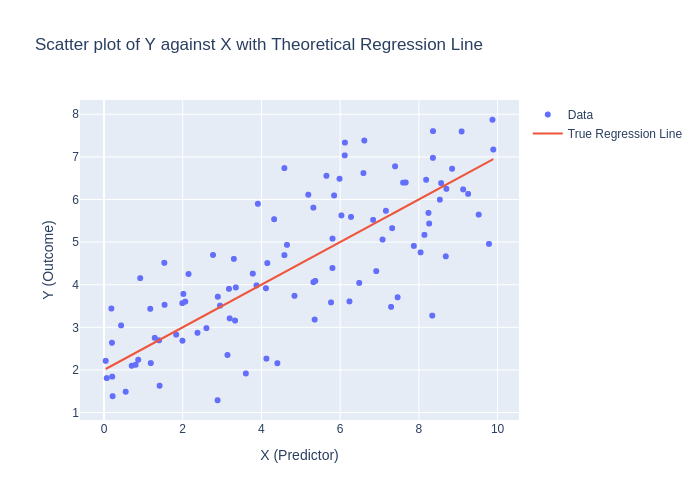

In [13]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import norm, uniform

# Parameters
n = 100  # number of data points
beta0 = 2.0  # intercept
beta1 = 0.5  # slope
sigma = 1.0  # standard deviation of error terms

# Generate predictor variable x and error terms with the same size
x = uniform.rvs(size=n, loc=0, scale=10)
epsilon = norm.rvs(size=n, loc=0, scale=sigma)

# Calculate Y based on the theoretical model
Y = beta0 + beta1 * x + epsilon

# Convert to a DataFrame for use with plotly.express
df = pd.DataFrame({'x': x, 'Y': Y})

# Plot using plotly.graph_objects for the theoretical line
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='True Regression Line'))
fig.update_layout(title="Scatter plot of Y against X with Theoretical Regression Line",
                  xaxis_title="X (Predictor)",
                  yaxis_title="Y (Outcome)")
fig.show(renderer="png")


Here's a concise summary of how to create a theoretical Simple Linear Regression model, generate simulated data, and visualize it using `plotly`:

### Summary of Simple Linear Regression Model

1. **Model Components**:
   - **Equation**: The model is represented as \( Y = \beta_0 + \beta_1 X + \epsilon \).
     - \( \beta_0 \): Intercept (expected value of \( Y \) when \( X = 0 \)).
     - \( \beta_1 \): Slope (change in \( Y \) for a one-unit increase in \( X \)).
     - \( X \): Predictor variable.
     - \( \epsilon \): Error term (random noise sampled from a normal distribution).

2. **Data Generation**:
   - Generate predictor values \( X \) from a uniform distribution.
   - Generate error terms \( \epsilon \) from a normal distribution.
   - Compute \( Y \) using the model equation.

3. **Visualization**:
   - Use `plotly.express` or `plotly.graph_objects` to create scatter plots of \( Y \) against \( X \).
   - For `plotly.express`, you can fit a trendline directly, but ensure you have a valid column for color if specified.
   - For `plotly.graph_objects`, you can plot the theoretical regression line without fitting it to the data.

### Example Code

Here’s a complete example of how to implement the above:

```python
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import norm, uniform

# Parameters
n = 100  # number of data points
beta0 = 2.0  # intercept
beta1 = 0.5  # slope
sigma = 1.0  # standard deviation of error terms

# Generate predictor variable x and error terms
x = uniform.rvs(size=n, loc=0, scale=10)
epsilon = norm.rvs(size=n, loc=0, scale=sigma)

# Calculate Y based on the theoretical model
Y = beta0 + beta1 * x + epsilon

# Create a DataFrame for use with plotly
df = pd.DataFrame({'x': x, 'Y': Y})

# Optional: Add a color column for plotly.express
df['Data'] = 'Simulated Data'

# Plot with plotly.express
fig1 = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
fig1.show()

# Plot with plotly.graph_objects (theoretical regression line)
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))
fig2.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='True Regression Line'))
fig2.update_layout(title="Scatter plot of Y against X with Theoretical Regression Line",
                   xaxis_title="X (Predictor)",
                   yaxis_title="Y (Outcome)")
fig2.show()
```

This code effectively demonstrates the theoretical model of Simple Linear Regression, generates simulated data, and visualizes the results.

https://chatgpt.com/share/67298b69-aef4-8006-983d-09aea5868167

Q2

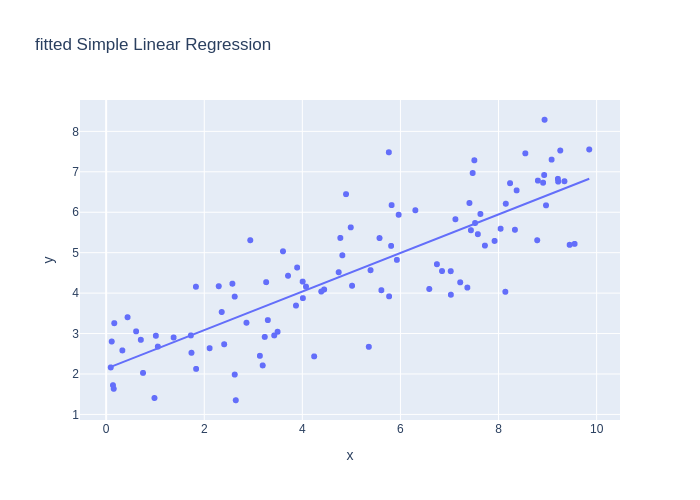

In [4]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

data = pd.DataFrame({'X': x, 'Y': Y})
fitted_model = smf.ols('Y ~ X', data=data).fit()

data['Y_pred'] = fitted_model.predict(data['X'])

fig = px.scatter(data, x=x, y=Y, 
           title="fitted Simple Linear Regression", trendline="ols")
fig.show(renderer="png")

Q3

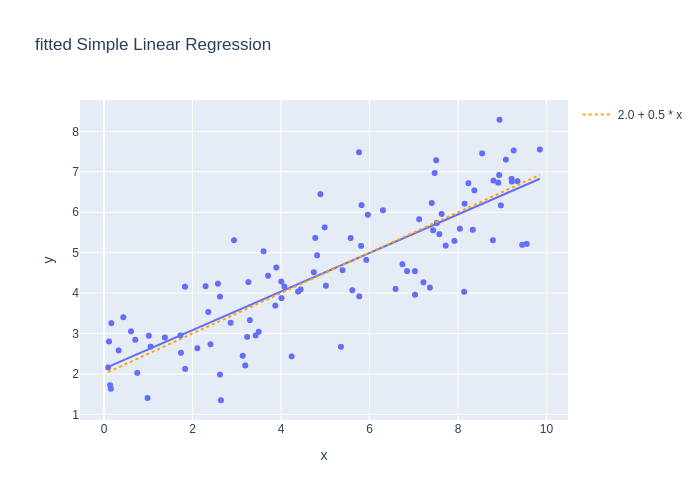

In [5]:
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

The theoretical Regression Line is based on the parameters that I given, but the fitted regression line is determined by the actual data, which fitted with the variation of the error, is adaptive and based on the data variability.

Q4

In [6]:
fitted_model.fittedvalues

0     3.005422
1     4.957919
2     4.807325
3     3.686792
4     3.976755
        ...   
95    3.278328
96    6.380379
97    2.786557
98    6.638585
99    3.988047
Length: 100, dtype: float64

In [7]:
fitted_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.1303,0.191,11.175,0.000,1.752,2.509
X,0.4771,0.033,14.579,0.000,0.412,0.542


In [8]:
fitted_model.params

Intercept    2.130255
X            0.477089
dtype: float64

In [9]:
fitted_model.params.values

array([2.13025493, 0.47708915])

fitted_model.fittedvalues is the y value based on the regression line we predicted, the coefficient for the linear regression line are given by fitted_model.summary().tables[1]. The slope(belta1) is given at the row "Intercept" column "coef" and the y-intercept is at row "X" column "coef". fitted_model.params or fitted_model.params.values just give us the value of slope and y-intercept, which is 2.0696 and 0.4586 respectively.

Q5

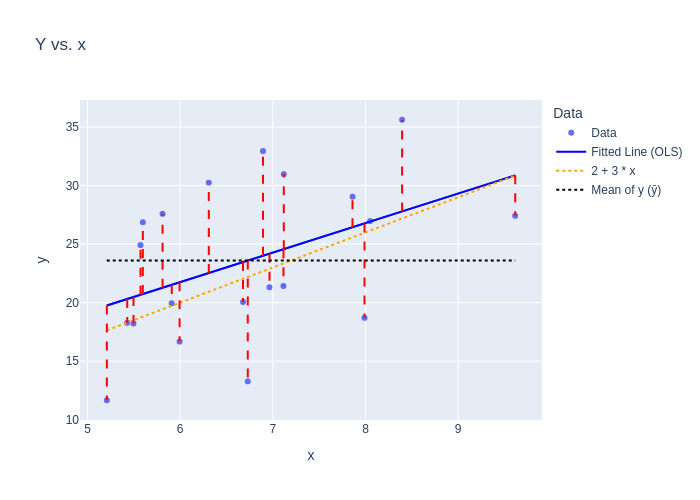

In [10]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Parameters
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': Y})

# Fit the model
model_data_specification = smf.ols("y ~ x", data=df)  # lowercase 'y'
fitted_model = model_data_specification.fit() 

# Plot data and trendline using Plotly Express
df['Data'] = 'Data'  # To add color label
fig = px.scatter(df, x='x', y='y', color='Data', trendline='ols', title='Y vs. x')

# Overlay the fitted trendline manually
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Line (OLS)")

# Add theoretical line
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=f"{beta0} + {beta1} * x", line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],  # Note: 'y' instead of 'Y'
                    mode='lines', line=dict(color='red', dash='dash'), showlegend=False)
    
# Add horizontal line at mean of y
fig.add_scatter(x=x_range, y=[df['y'].mean()] * 2, mode='lines',
                line=dict(color='black', dash='dot'), name='Mean of y (ȳ)')

fig.show(renderer="png")  # Use `renderer="png"` for certain platforms


The line is chosen for the fitted model based on observed data using the "ordinary least squares" method is thet the line which have the least of the sum of squared residual values. OLS chooses the line that has the smallest possible sum of these squared errors, resulting in the best linear fit to the observed data.

Q6

In [16]:
1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()

0.6588405073733159

(Y-fitted_model.fittedvalues)**2).sum() is the sum of the difference between the outcome variables and the fitted values, and ((Y-Y.mean())**2).sum() is the difference between outcome variables and mean value, the division captures the proportion, and 1- is that the proportion that determines Y values align with the predictions.

In [17]:
fitted_model.rsquared

0.6588405073733159

fitted_model.rsquared directly gives the proportion of variance explained by the model.The variance less, the accuracy will be greater.

In [18]:
np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2

0.6588405073733161

np.corrcoef(Y,fitted_model.fittedvalues)[0,1] **2 is the squared difference between outcome variables and the fitted values, it yields the proportion of variance in Y explained by its linear relationship with the fitted values.

In [19]:
np.corrcoef(Y,x)[0,1]**2

0.6588405073733158

np.corrcoef(Y,x)[0,1]**2 is the squared difference between predictor and the outcome variables. It measures the strength of their linear relationship.

Q7

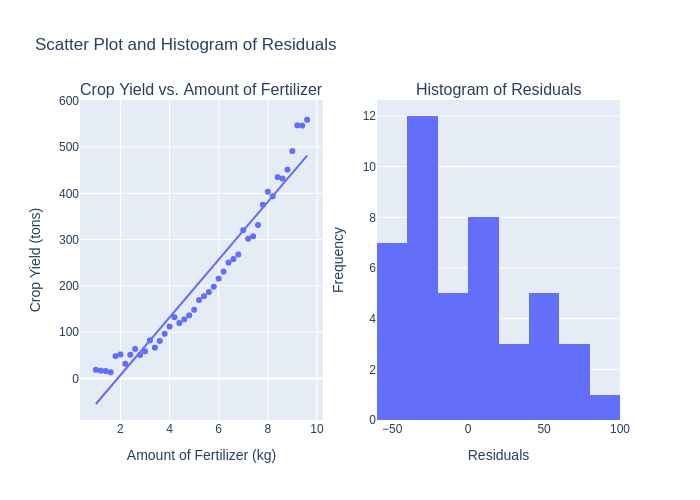

In [14]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.The simple linear regression model should based on two variables that are independent with each others. But in this senario, the crop yield is dependent with the amount of fertilizer.

2.Based on the scatter plot, the relationship between the amount of fertilizer used and crop yield does not seem linear. But for simple linear regression model should be linear.

3.the residuals histogram shows that the variance of error is not constant

Here's a summary of our recent discussion:

1. **Plotting and Interpretation**: We explored creating scatter plots with regression lines in Python using `plotly` and `statsmodels`. You plotted data points with a fitted regression line (`trendline='ols'`) and added elements like theoretical lines and residuals, highlighting how to visualize the fit and residuals effectively.

2. **Simple Linear Regression Concepts**:
   - **Difference Between Lines**: We discussed how the theoretical line (based on true parameters) differs from the fitted line derived from observed data using ordinary least squares (OLS), which minimizes the sum of squared residuals.
   - **R-squared Interpretation**: We explored how expressions like `fitted_model.rsquared` and `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2` reflect the proportion of variance in \( Y \) explained by the model, with higher values indicating better model accuracy.
   - **Assumptions of Simple Linear Regression**: We reviewed key assumptions (linearity, independence, homoscedasticity, normality of errors), and you examined the compatibility of these assumptions with sample data (fertilizer amount vs. crop yield). We found potential issues with linearity and homoscedasticity, suggesting a non-linear relationship might fit better.

These discussions provided insights into data visualization, model assumptions, interpretation of R-squared, and diagnostic checks for linear regression. Let me know if you'd like a deeper dive into any of these points!

https://chatgpt.com/share/672aa2cd-8168-8006-822b-4bb6b2b6fd69

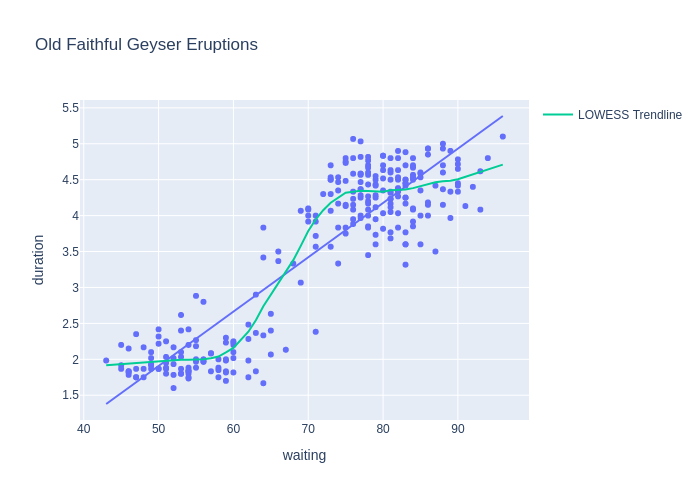

In [2]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q8

null hypothesis: there is no linear association between waiting and duration.

In [16]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:13:27   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value from the OLS regression result is 0.000 which is less than significant level 0.05, thus we can conclude that there is a strong statisitcally evidence that reject our null hypothesis which states there is no association between waiting and duration.This suggests that there is evidence of a linear relationship between waiting time and eruption duration in the Old Faithful dataset.

Q9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


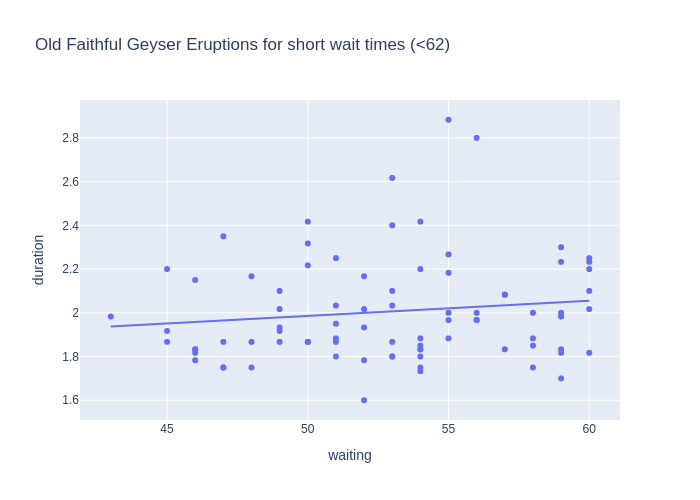

In [17]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Because the p-value is 0.238, which is greater than significant level, thus we fail to reject our null hypothesis, we dont have statistical evidence to support this association.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


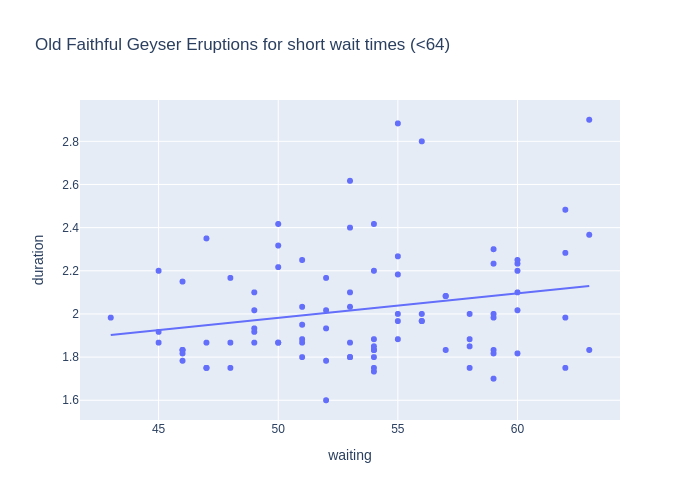

In [18]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Because the p-value is 0.036, which is greater than significant level, thus we fail to reject our null hypothesis, we dont have statistical evidence to support this association.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


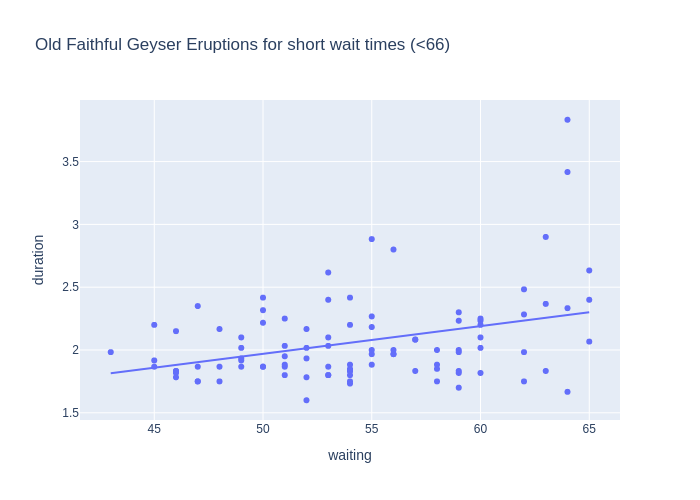

In [19]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Because the p-value is 0.000, which is less than significant level, thus we reject our null hypothesis, we have statistical evidence to support this association.

Q10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


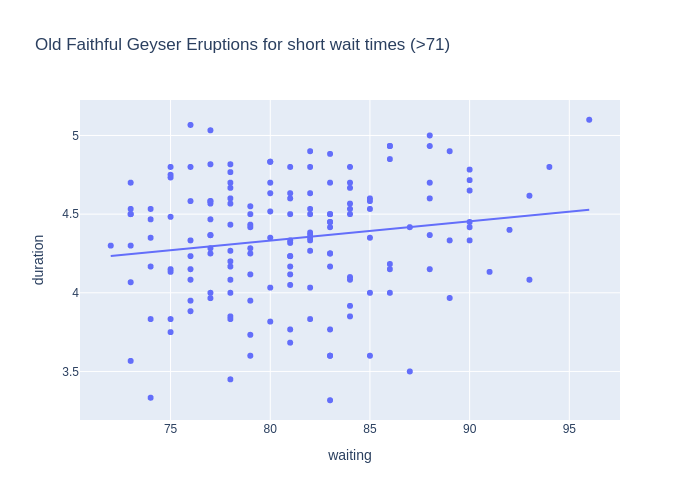

In [20]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

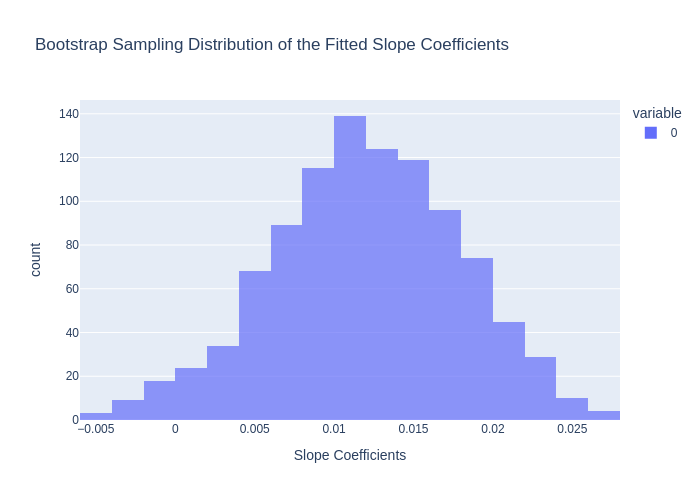

In [21]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

number_of_simulations = 1000
n = 160
bootstrapped_slope_coefficients = []
bootstrapped_lines = []

for i in range(number_of_simulations):
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    x = bootstrap_sample['waiting']
    y = model.predict(bootstrap_sample['waiting'])
    bootstrapped_slope_coefficients.append(model.params.iloc[1])
    
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

fig = px.histogram(
    bootstrapped_slope_coefficients, 
    labels={'value': 'Slope Coefficients'}, 
    title="Bootstrap Sampling Distribution of the Fitted Slope Coefficients",
    opacity=0.7,
    nbins=30
)

fig.show(renderer="png")

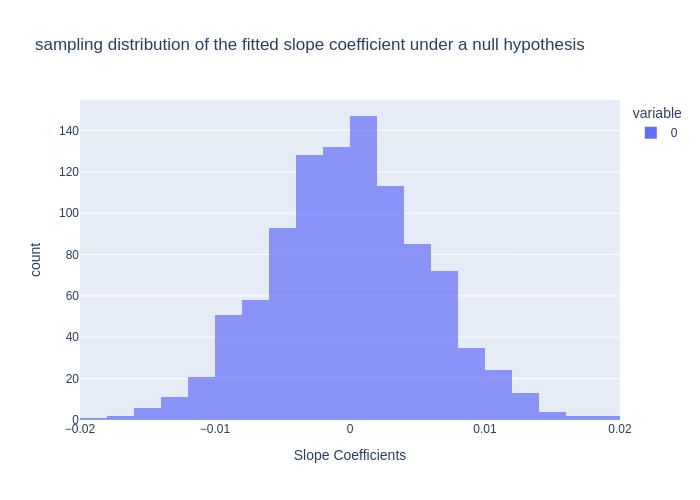

In [22]:
beta_0 = 1.65
beta_1 = 0
sigma = 0.37

simulated_slope_coefficients = []

n_simulations = 1000

for _ in range(n_simulations):
    simulated_data = old_faithful[long_wait].copy()
    simulated_data['duration'] = beta_0 + beta_1 * simulated_data['waiting'] + stats.norm(loc=0, scale=sigma).rvs(size=len(simulated_data))
    X_sim = sm.add_constant(simulated_data['waiting'])
    y_sim = simulated_data['duration']
    model_sim = sm.OLS(y_sim, X_sim).fit()
    simulated_slope_coefficients.append(model_sim.params.iloc[1])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

fig = px.histogram(
    simulated_slope_coefficients, 
    labels={'value': 'Slope Coefficients'}, 
    title="sampling distribution of the fitted slope coefficient under a null hypothesis",
    opacity=0.7,
    nbins=30
)

fig.show(renderer="png")

In [62]:
np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

array([0.00023296, 0.02263669])

0 is not contained within a 95% bootstrapped confidence interval

In [64]:
(np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]).mean()

0.042

In [65]:
smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


p-value not match

Q11

In [24]:
smf.ols('duration ~ waiting', data=old_faithful)

In [27]:
smf.ols('duration ~ waiting', data=old_faithful[short_wait])

In [31]:
smf.ols('duration ~ waiting', data=old_faithful[long_wait])

smf.ols('duration ~ waiting', data=old_faithful) is the model that includes all observations, determines the ossociation between duration and waiting time; smf.ols('duration ~ waiting', data=old_faithful[short_wait]) only includes the observations according to short wait; smf.ols('duration ~ waiting', data=old_faithful[long_wait])only includes the observations according to long wait.
The new model is a non-paired two samples model,estimating the difference in duration between the two wait time categories, determines the new model is a non-paired two samples model,estimating the difference in duration between the two wait time categories, determines.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


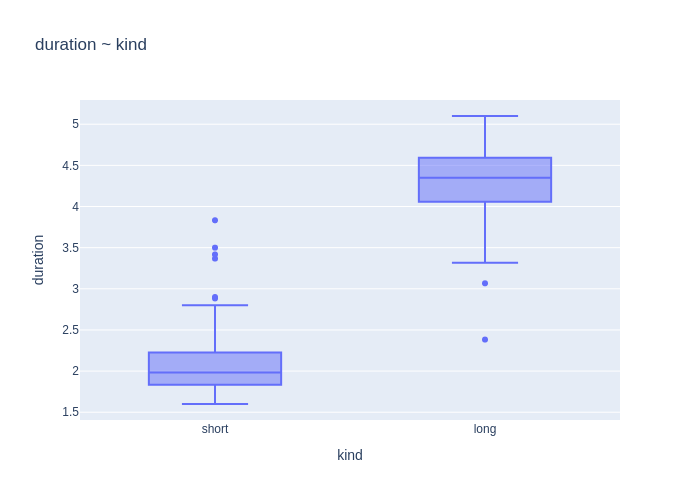

In [32]:
from IPython.display import display
import statsmodels.formula.api as smf

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Because the p-value for indicator model is 0.000, which is less than significant level, thus there is statisitical evidence that there is a difference bewteen two mean values, which rejects our null hypothesis.

Q12

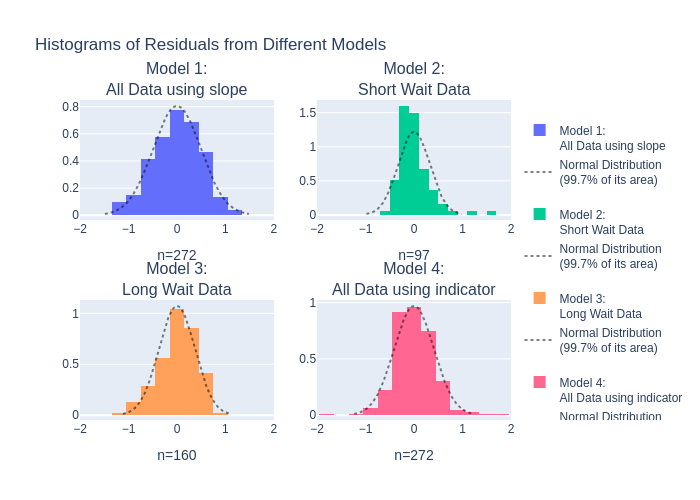

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

model 1 fits the assumption. For model2, there's several outliers in the right side of residuals histogram; for model 3, the histogram is not symmetric through the center; for model3, the shape is not satisfied, not a bell-shape, it has flatter shape.

Q13

In [41]:
import numpy as np
import pandas as pd

short_threshold = 64  
long_threshold = 71  
old_faithful['kind'] = np.where(old_faithful['waiting'] < short_threshold, 'short', 'long')

observed_stat = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Step 3: Permutation Test (shuffling labels)
n_permutations = 10000
perm_diffs = []

for _ in range(n_permutations):
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)

    perm_stat = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    perm_diffs.append(perm_stat)

# Step 4: Calculate p-value (proportion of permuted differences >= observed difference)
perm_diffs = np.array(perm_diffs)
p_value_perm = np.mean(np.abs(perm_diffs) >= np.abs(observed_stat))

# Step 5: Bootstrapping (for calculating the confidence interval of the mean difference)
n_bootstraps = 10000
bootstrap_diffs = []

for _ in range(n_bootstraps):
    # Resample with replacement within each group
    short_resampled = old_faithful[old_faithful['kind'] == 'short']['duration'].sample(frac=1, replace=True)
    long_resampled = old_faithful[old_faithful['kind'] == 'long']['duration'].sample(frac=1, replace=True)
    
    # Compute the difference in means for the resampled data
    bootstrap_diff = short_resampled.mean() - long_resampled.mean()
    bootstrap_diffs.append(bootstrap_diff)

# Step 6: Calculate the 95% bootstrap confidence interval
bootstrap_diffs = np.array(bootstrap_diffs)
lower_ci = np.percentile(bootstrap_diffs, 2.5)
upper_ci = np.percentile(bootstrap_diffs, 97.5)

# Results
print(f"Observed Mean Difference: {observed_stat}")
print(f"Permutation Test p-value: {p_value_perm}")
print(f"95% Bootstrap Confidence Interval: ({lower_ci}, {upper_ci})")


Observed Mean Difference: 2.188910500610501
Permutation Test p-value: 0.0
95% Bootstrap Confidence Interval: (-2.286248327228327, -2.090021144688645)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns


short_threshold = 64  
long_threshold = 71   
old_faithful['kind'] = np.where(old_faithful['waiting'] < short_threshold, 'short', 'long')
n_bootstraps = 10000
bootstrap_diffs = []


for _ in range(n_bootstraps):
    # Resample within each group (with replacement)
    short_resampled = old_faithful[old_faithful['kind'] == 'short']['duration'].sample(frac=1, replace=True)
    long_resampled = old_faithful[old_faithful['kind'] == 'long']['duration'].sample(frac=1, replace=True)
    
    # Compute the difference in means for the resampled data
    bootstrap_diff = short_resampled.mean() - long_resampled.mean()
    bootstrap_diffs.append(bootstrap_diff)

# Step 4: Calculate the 95% bootstrap confidence interval
bootstrap_diffs = np.array(bootstrap_diffs)
lower_ci = np.quantile(bootstrap_diffs, 0.025)
upper_ci = np.quantile(bootstrap_diffs, 0.975)

# Step 5: Print the results
print(f"95% Bootstrap Confidence Interval for the Mean Difference: ({lower_ci}, {upper_ci})")


95% Bootstrap Confidence Interval for the Mean Difference: (-2.282238028083029, -2.0885593894993906)


(a)permuation test:First, we shuffle the "kind" labels randomly across the data; Second, calculate the mean duration for the reshuffled "short" and "long" groups and record the difference in these means; repeat many times, creating a distribution of mean differences under the assumption that there’s no true difference between the groups.
5% bootstrap confidence interval: resample with Replacement within each Group; calculate the mean difference; repeat the process for several times
(b)Similarities: Both approaches ultimately assess whether the difference between groups is significant, but they arrive at this in different ways. Both methods provide p-values and are not strongly dependent on the data distribution, especially the permutation test.
Differences: The permutation test requires fewer assumptions than regression-based approaches, as it does not rely on model assumptions about the linearity or homoscedasticity of the data. The indicator model is parametric, using the data to estimate parameters under assumed conditions, whereas the permutation test is non-parametric, testing the hypothesis through randomization.

Here’s a summary of our discussion:

1. **Permutation Test**:
   - We outlined a permutation test to assess whether there’s a significant difference in the duration of geyser eruptions between "short" (wait times <64 minutes) and "long" (wait times >71 minutes) groups.
   - The test involves repeatedly shuffling the "short" and "long" labels to generate a null distribution of mean differences, comparing it to the observed difference to calculate a p-value.

2. **Bootstrap Confidence Interval**:
   - We created a 95% bootstrap confidence interval for the difference in mean durations between the "short" and "long" groups.
   - The method resamples with replacement within each group, calculates the mean difference for each resample, and uses the 2.5th and 97.5th percentiles of the resampled differences to create the confidence interval.

3. **Comparison of Methods**:
   - We compared the permutation test and bootstrap sampling to an **indicator variable-based model** from a prior question. The indicator variable model uses regression, with a binary variable representing group membership.
   - Both the permutation test and bootstrap sampling are non-parametric, requiring fewer assumptions, whereas the indicator model is parametric, relying on assumptions of linearity, independence, and homoscedasticity.
   - All three approaches estimate or test the difference between groups, with permutation focusing on significance testing, bootstrap providing a confidence interval, and the indicator model giving both significance and interval estimates under parametric assumptions.

This discussion covered the purpose, process, and interpretations for each method, as well as their similarities and differences in testing and estimating group differences.

https://chatgpt.com/share/672d78d2-49dc-8006-9699-89ea9fe52b38

Q15

yes